In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import display

pd.set_option('display.max_columns', None)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
import warnings
import classifier_utils
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [3]:
project_name = "android__platform_frameworks_base"
project_name = project_name.replace('/','__')
df_training = pd.read_csv(f'../../data/projects/{project_name}-training.csv')

In [4]:
df_na = df_training[df_training.isna().any(axis=1)]
print(f'Total number of rows for project {project_name}: {len(df_training)}')
print(f'Percentage of rows with missing values: {len(df_na)}/{len(df_training)} ({(len(df_na) / len(df_training))*100:.2f}%)')

Total number of rows for project android__platform_frameworks_base: 3557
Percentage of rows with missing values: 1097/3557 (30.84%)


# Class distributions

### Normalized (%)

In [5]:
class_distribution_normalized = classifier_utils.get_project_class_distribution(project_name)

class_distribution_normalized

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,android__platform_frameworks_base,70.77,7.64,9.02,2.68,1.42,8.13,0.33


### Count

In [6]:
class_distribution_count = classifier_utils.get_project_class_distribution(project_name, False)

class_distribution_count

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,android__platform_frameworks_base,1741,188,222,66,35,200,8


# Classifiers

In [19]:
# choose which algorithm to use
algorithm = DecisionTreeClassifier(random_state=99)
# algorithm = RandomForestClassifier(random_state=99)
# algorithm = XGBRFClassifier(random_state=99)

In [20]:
result = classifier_utils.ProjectsResults(algorithm, [project_name], non_features_columns)

In [21]:
report = result.get_report_df()
report

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
0,android__platform_frameworks_base,3557,2460,0.775,0.778,0.776,0.778,0.708,0.239


### Inspect project

In [22]:
sample_project = result.get_project(project_name)

,precision,recall,f1-score,support
Combination,0.461883,0.463964,0.462921,222.000000
ConcatenationV1V2,0.275862,0.242424,0.258065,66.000000
ConcatenationV2V1,0.142857,0.114286,0.126984,35.000000
Manual,0.295775,0.315000,0.305085,200.000000
None,0.000000,0.000000,0.000000,8.000000
Version 1,0.936000,0.940839,0.938413,1741.000000
Version 2,0.494444,0.473404,0.483696,188.000000
accuracy,0.777642,0.777642,0.777642,0.777642
macro avg,0.372403,0.364274,0.367880,2460.000000
weighted avg,0.775379,0.777642,0.776412,2460.000000


None

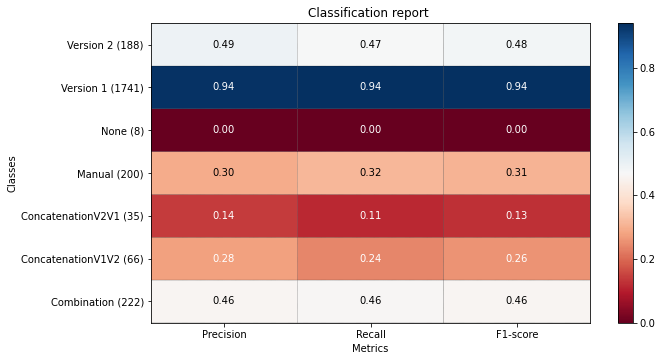

In [23]:
display(sample_project.get_scores_df())
display(classifier_utils.plot_classification_report(sample_project.scores))

### Confusion matrix

In [24]:
display(sample_project.get_confusion_matrix_df())

Columns = predicted label
Rows = true label


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Combination,103,9,4,45,2,33,26
ConcatenationV1V2,10,16,4,19,0,9,8
ConcatenationV2V1,5,3,4,10,2,7,4
Manual,51,15,7,63,0,31,33
None,4,0,0,0,0,1,3
Version 1,29,8,7,40,2,1638,17
Version 2,21,7,2,36,2,31,89
